In [1]:
##Tutorial Overview
## 1. K nearest Neighbor Imputation
## 2. Horse Colic Dataset
## 3. Nearest Neigbhor Imputation with KNNImputer

### K - Nearest Neighbor Imputation

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Loading the dataset
dataframe = pd.read_csv("horse-colic.csv",header=None,na_values="?")

In [4]:
print(dataframe.head())

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]


In [7]:
## printing the percentage of missing values in each feature
for i in range(dataframe.shape[1]):
    nm_missing = dataframe[[i]].isnull().sum()
    per_missing = nm_missing/dataframe.shape[0] * 100
    print('> %d Missing: %d (%.1f%%)'%(i,nm_missing,per_missing))

> 0 Missing: 1 (0.3%)
> 1 Missing: 0 (0.0%)
> 2 Missing: 0 (0.0%)
> 3 Missing: 60 (20.0%)
> 4 Missing: 24 (8.0%)
> 5 Missing: 58 (19.3%)
> 6 Missing: 56 (18.7%)
> 7 Missing: 69 (23.0%)
> 8 Missing: 47 (15.7%)
> 9 Missing: 32 (10.7%)
> 10 Missing: 55 (18.3%)
> 11 Missing: 44 (14.7%)
> 12 Missing: 56 (18.7%)
> 13 Missing: 104 (34.7%)
> 14 Missing: 106 (35.3%)
> 15 Missing: 247 (82.3%)
> 16 Missing: 102 (34.0%)
> 17 Missing: 118 (39.3%)
> 18 Missing: 29 (9.7%)
> 19 Missing: 33 (11.0%)
> 20 Missing: 165 (55.0%)
> 21 Missing: 198 (66.0%)
> 22 Missing: 1 (0.3%)
> 23 Missing: 0 (0.0%)
> 24 Missing: 0 (0.0%)
> 25 Missing: 0 (0.0%)
> 26 Missing: 0 (0.0%)
> 27 Missing: 0 (0.0%)


In [10]:
from sklearn.impute import KNNImputer

#define imputer
imputer = KNNImputer(n_neighbors=5,weights="uniform",metric="nan_euclidean")

data = dataframe.values
X = data[:,:-1]
y = data[:,-1]

print("Total missing values :",np.sum(np.isnan(X)))
#fitting the data
imputer.fit(X)

## transform the dataset
Xtrans = imputer.transform(X)

print("Total missing values after KNNImputer:",np.sum(np.isnan(Xtrans)))

Total missing values : 1605
Total missing values after KNNImputer: 0


### KNN imputer and model evaluation

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

dataframe = pd.read_csv('horse-colic.csv',header=None,na_values="?")

data = dataframe.values

X = data[:,:-1]
y = data[:,-1]

imputer = KNNImputer(n_neighbors=5,weights="uniform",metric="nan_euclidean")

pipeline = Pipeline(steps=[("i",imputer),
                     ("clf",RandomForestClassifier())])
#Cross validation
cv =  RepeatedStratifiedKFold(n_splits=10,n_repeats=3 ,random_state=1)

#evaluate model
scores = cross_val_score(pipeline,X,y,cv=cv,scoring="accuracy",n_jobs=-1)

print("Mean Accuracy : %.3f  (%.3f)"%(np.mean(scores),np.std(scores)))

Mean Accuracy : 0.763  (0.067)


### KNN Imputer and different number of negibhors

Mean Accuracy :1  0.700  (0.054)
Mean Accuracy :3  0.730  (0.070)
Mean Accuracy :5  0.770  (0.082)
Mean Accuracy :7  0.799  (0.064)
Mean Accuracy :9  0.797  (0.058)
Mean Accuracy :15  0.793  (0.069)
Mean Accuracy :18  0.806  (0.070)
Mean Accuracy :21  0.816  (0.069)
Mean Accuracy :30  0.826  (0.073)


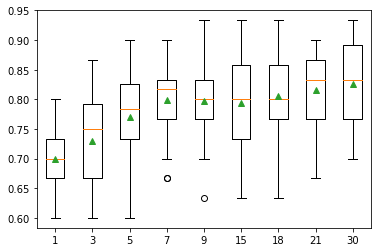

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


dataframe = pd.read_csv('horse-colic.csv',header=None,na_values="?")

data = dataframe.values

X = data[:,:-1]
y = data[:,-1]

results = []

strategis = [str(i) for i in [1,3,5,7,9,15,18,21,30]]

for s in strategis:
    
    imputer = KNNImputer(n_neighbors=int(s),weights="uniform",metric="nan_euclidean")

    pipeline = Pipeline(steps=[("i",imputer),
                     ("clf",RandomForestClassifier())])
    
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    
    scores = cross_val_score(pipeline,X,y,cv=cv,scoring="accuracy",n_jobs=-1)
    
    results.append(scores)
    
    print("Mean Accuracy :%s  %.3f  (%.3f)"%(s ,np.mean(scores),np.std(scores)))

plt.boxplot(results,labels=strategis,showmeans=True)
plt.show()


### KNN Imputer transform when making prediction

In [21]:
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, np.nan, np.nan, 3, 5, 45.00,
8.40, np.nan, np.nan, 2, 11300, 00000, 00000, 2]

dataframe = pd.read_csv('horse-colic.csv',header=None,na_values="?")

data = dataframe.values

X = data[:,:-1]
y = data[:,-1]

pipeline = Pipeline(steps=[("i",KNNImputer(n_neighbors=18)),
                           ("clf",RandomForestClassifier())])

pipeline.fit(X,y)

#predict

yhat = pipeline.predict([row])

print("Predicted class is ",yhat[0])

Predicted class is  2.0
